In [1]:
#using Pkg

In [2]:
#Pkg.add(url="https://github.com/trappmartin/DeepStructuredMixtures")

In [3]:
#Pkg.add("Plots")

In [2]:
using Plots
using DeepStructuredMixtures
using Random

In [3]:
using CSV
using DataFrames

In [63]:
ytrain = Matrix( CSV.read("y_train.csv", DataFrame, header=0) )[:,1];

In [300]:
Xtrain = Matrix( CSV.read("X_train.csv", DataFrame, header=0) );
Xtest = Matrix( CSV.read("X_test.csv", DataFrame, header=0) );

In [329]:
kernOpt = IsoSE( log(0.1), log(sqrt(1.1)) )

IsoSE{Float64}(-2.3025850929940455, 0.04765508990216251, 0.0, 0.0)

In [330]:
lognoiseOpt = log(0.3)

-1.2039728043259361

In [331]:
meanOpt = ConstMean(0.);

In [462]:
# should be also full GP
model0 = buildDSMGP(Xtrain, ytrain, 2, 2; M = 60, kernel = kernOpt, meanFun = meanOpt, logNoise=lognoiseOpt);
update!(model0);

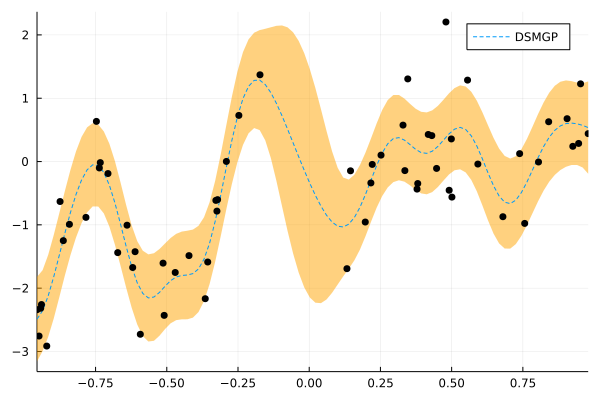

In [463]:
plot(model0)

In [464]:
m, s = predict(model0, Xtest);

In [465]:
v = s+exp(lognoiseOpt) *ones(length(s));

In [466]:
CSV.write("ms_deepStructMix_fullGP.csv",  Tables.table(hcat(m,v,Xtest)), writeheader=false)

"ms_deepStructMix_fullGP.csv"

In [535]:
K = 4 #Number of children under each sum node            # Number of splits per product node
V = 3 #Number of splits at each split node               # Number of children per sum node
M =  10 #10 # Minimum number of observations per expert

10

In [536]:
model = buildDSMGP(Xtrain, ytrain, K, V; M = M, kernel = kernOpt, meanFun = meanOpt, logNoise=lognoiseOpt);
update!(model)

-107.73252183306484

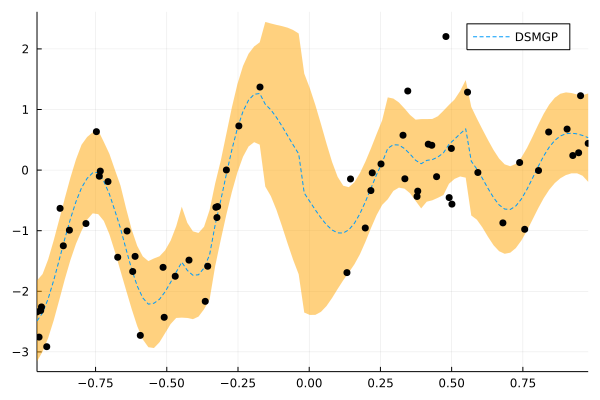

In [537]:
plot(model)

In [538]:
mm, ss = predict(model, Xtest);

In [539]:
vv = ss+exp(lognoiseOpt) *ones(length(ss));

In [540]:
CSV.write("ms_deepStructMix_mixture.csv",  Tables.table(hcat(mm,vv,Xtest)), writeheader=false)

"ms_deepStructMix_mixture.csv"

In [218]:
xtest = collect(range(-0.5, stop=1.5, length = 1000))
Xtest = reshape(xtest,:,1);

In [219]:
m, s = predict(model, Xtest);
m0, s0 = predict(model0, Xtest);

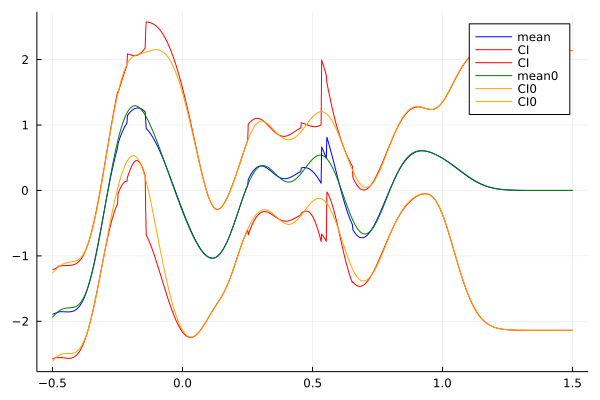

In [220]:
plot(xtest,m, label="mean", color="blue")
plot!(xtest,m+1.96*sqrt.(s), label="CI", color="red" )
plot!(xtest,m-1.96*sqrt.(s), label="CI", color="red" )


plot!(xtest,m0, label="mean0", color="green")
plot!(xtest,m0+1.96*sqrt.(s0), label="CI0", color="orange")
plot!(xtest,m0-1.96*sqrt.(s0), label="CI0", color="orange")


In [221]:
# A (generalized) product of experts (PoE) model with K splits per node and a miminum of M observations per expert
modPoE = buildPoE(Xtrain, ytrain, K; generalized = true, M = M, kernel = kernOpt, meanFun = meanf, logNoise=lognoiseOpt);

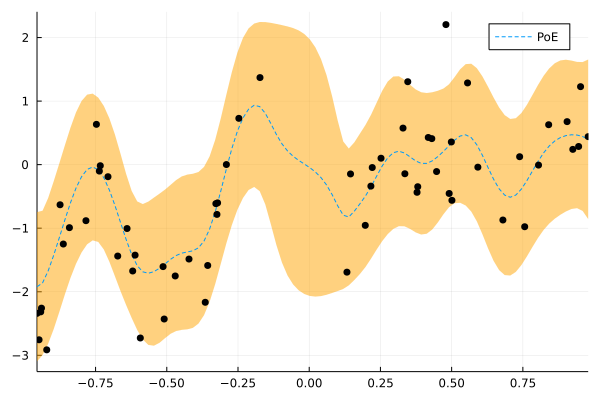

In [222]:
plot( modPoE )

In [223]:
modPoE.root.children[1].nobs

16

In [224]:
# A (robust) Bayesian comittee machine (BCM) model with K splits per node and a miminum of M observations per expert
# ! Training not implemented !
modBCM = buildBCM(Xtrain, ytrain, K; M = M, kernel = kernOpt, meanFun = meanf, logNoise=lognoiseOpt);

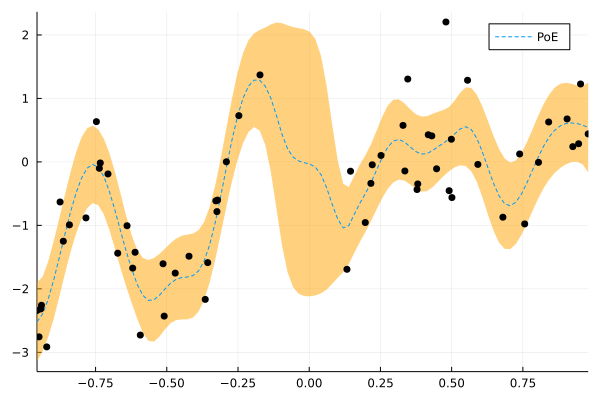

In [225]:
plot(modBCM)